# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#api_keys.api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_keys.api_key)

7e6496202f8ff2039053b9bdb7a363c6


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)#size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)#size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(lat_lng, " : ", city)   
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
pprint(cities)

742
['mataura',
 'ushuaia',
 'tessalit',
 'provideniya',
 'airai',
 'rikitea',
 'jamestown',
 'henties bay',
 'punta arenas',
 'kaitangata',
 'louisbourg',
 'hunza',
 'ocos',
 'northam',
 'tura',
 'kapaa',
 'mattru',
 'barentsburg',
 'kurilsk',
 'barrow',
 'yongan',
 'cherskiy',
 'saint anthony',
 'georgetown',
 'hobart',
 'erenhot',
 'cape town',
 'tuktoyaktuk',
 'samusu',
 'whitehorse',
 'ilulissat',
 'marzuq',
 'tasiilaq',
 'leningradskiy',
 'deputatskiy',
 'mar del plata',
 'chuy',
 'krasnoselkup',
 'vostok',
 'upernavik',
 'glendive',
 'the valley',
 'severo-kurilsk',
 'albany',
 'naze',
 'tiksi',
 'naranjito',
 'belushya guba',
 'kissidougou',
 'vaini',
 'butaritari',
 'garissa',
 'rio grande',
 'hithadhoo',
 'portland',
 'bluff',
 'port elizabeth',
 'ombessa',
 'wulanhaote',
 'victoria',
 'ribeira grande',
 'amarkantak',
 'hilo',
 'cockburn town',
 'codrington',
 'castro',
 'khatanga',
 'haines junction',
 'novikovo',
 'illoqqortoormiut',
 'yellowknife',
 'nouadhibou',
 'labuhan

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
import pyowm as owm
owm = owm.OWM(api_keys.api_key)

currentDateTime = datetime.datetime.now()

cityList = []
cityCountry = []
cityDate = []
cityLat = []
cityLon = []
cityTemp = []
cityTempMax = []
cityWindSpeed = []
cityClouds = []
cityHumidity = []

print("Number of cities: ", len(cities))
print("Estimated time to complete: ", round(len(cities)/60, 1), "Minutes\n")

#for i in range(3):
for i in range(len(cities)):
    try:
        cityLink = owm.weather_at_place(cities[i]) #establish link
        #print("cityLink: ", cityLink) # print link for api call
        
        #establish and make apicalls
        cityWeather = cityLink.get_weather() #get weather from link
        cityLocation = cityLink.get_location()
        cityReg = owm.city_id_registry()

        
        print(i)
        print("Link Established - Got Weather")
        #city name
        print("City: ", cities[i]) #show which city is being processed, api call was completed
        #country
        print("Country: ", cityReg.ids_for(cities[i])[0][2])
        #date of reception
        print("Date: ", cityWeather.get_reference_time()) #show which city is being processed, api call was completed
        #city latitude and longitude
        print("City Latitude: ", cityLocation.get_lat()) #print latitude
        print("City Longitude: ", cityLocation.get_lon()) #print longitude
        #city temperature
        print("Temp: ", cityWeather.get_temperature(unit="celsius")["temp"])
        #city max temperature
        print("Temp Max: ", cityWeather.get_temperature(unit="celsius")["temp_max"])
        #city wind speed
        print("Wind Speed: ", cityWeather.get_wind(unit="meters_sec")["speed"])        
        #city humidity as an integer
        print("Clouds: ", cityWeather.get_humidity()) #shows humidity, number value
        #city cloud cover as an integer
        print("Clouds: ", cityWeather.get_clouds()) #shows clouds, number value
        #print new line for separation
        
        #append all information
        cityList.append(cities[i]) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityCountry.append(cityReg.ids_for(cities[i])[0][2]) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityDate.append(cityWeather.get_reference_time()) #append city to cityList, when call complete. will not append if call not completed
        #print("done")
        cityLat.append(cityLocation.get_lat()) #append latitude
        #print("done")
        cityLon.append(cityLocation.get_lon()) #append longitude
        #print("done")
        cityTemp.append(cityWeather.get_temperature(unit="celsius")["temp"])
        #print("done")
        cityTempMax.append(cityWeather.get_temperature(unit="celsius")["temp_max"])
        #print("done")
        cityWindSpeed.append(cityWeather.get_wind(unit="meters_sec")["speed"])
        #print("done")
        cityHumidity.append(cityWeather.get_humidity()) #append humidity to list
        #print("done")
        cityClouds.append(cityWeather.get_clouds()) #append cloud cover to list        
        #print("done")
        
    except:
        print(cities[i], " - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...")

    print()

    if (i != 0 and i % 60 == 0):
        print("PAUSE\n")
        time.sleep(40)
        
        
print("!!!!!!!!!!!!!!!!!!!!DONE!!!!!!!!!!!!!!!!!")
print("Number of cities entered: ", len(cityList))

Number of cities:  742
Estimated time to complete:  12.4 Minutes

0
Link Established - Got Weather
City:  mataura
mataura  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

1
Link Established - Got Weather
City:  ushuaia
Country:  AR
Date:  1544662800
City Latitude:  -54.81
City Longitude:  -68.31
Temp:  11.0
Temp Max:  11.0
Wind Speed:  3.1
Clouds:  71
Clouds:  90

2
Link Established - Got Weather
City:  tessalit
Country:  ML
Date:  1544664174
City Latitude:  20.2
City Longitude:  1.01
Temp:  8.16
Temp Max:  8.16
Wind Speed:  1.25
Clouds:  39
Clouds:  0

3
Link Established - Got Weather
City:  provideniya
Country:  RU
Date:  1544662800
City Latitude:  64.42
City Longitude:  -173.23
Temp:  -11.0
Temp Max:  -11.0
Wind Speed:  6
Clouds:  72
Clouds:  90

4
Link Established - Got Weather
City:  airai
airai  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

5
Link Established - Got Weather
City:  rikitea
Country:  PF
Date:  1544664175
City Latitude:  -23.12
City Longitude:  -1

48
Link Established - Got Weather
City:  kissidougou
Country:  GN
Date:  1544664196
City Latitude:  9.19
City Longitude:  -10.1
Temp:  21.43
Temp Max:  21.43
Wind Speed:  2.65
Clouds:  70
Clouds:  8

49
Link Established - Got Weather
City:  vaini
Country:  TO
Date:  1544662800
City Latitude:  15.34
City Longitude:  74.49
Temp:  14.0
Temp Max:  14.0
Wind Speed:  0.95
Clouds:  87
Clouds:  0

50
Link Established - Got Weather
City:  butaritari
Country:  KI
Date:  1544664197
City Latitude:  3.07
City Longitude:  172.79
Temp:  29.58
Temp Max:  29.58
Wind Speed:  6.95
Clouds:  100
Clouds:  76

51
Link Established - Got Weather
City:  garissa
Country:  KE
Date:  1544664198
City Latitude:  -0.46
City Longitude:  39.64
Temp:  21.56
Temp Max:  21.56
Wind Speed:  1.85
Clouds:  95
Clouds:  0

52
Link Established - Got Weather
City:  rio grande
Country:  BR
Date:  1544664199
City Latitude:  -32.03
City Longitude:  -52.1
Temp:  21.63
Temp Max:  21.63
Wind Speed:  2.45
Clouds:  95
Clouds:  92

53
Lin


93
Link Established - Got Weather
City:  statesboro
Country:  US
Date:  1544663700
City Latitude:  32.45
City Longitude:  -81.78
Temp:  5.01
Temp Max:  6.7
Wind Speed:  2.2
Clouds:  90
Clouds:  1

94
Link Established - Got Weather
City:  bonham
Country:  US
Date:  1544662560
City Latitude:  33.58
City Longitude:  -96.18
Temp:  14.83
Temp Max:  16.1
Wind Speed:  4.1
Clouds:  89
Clouds:  90

95
Link Established - Got Weather
City:  cap malheureux
Country:  MU
Date:  1544662800
City Latitude:  -19.98
City Longitude:  57.61
Temp:  25.0
Temp Max:  25.0
Wind Speed:  2.6
Clouds:  78
Clouds:  20

96
Link Established - Got Weather
City:  busselton
Country:  AU
Date:  1544664260
City Latitude:  -33.64
City Longitude:  115.35
Temp:  19.38
Temp Max:  19.38
Wind Speed:  7.95
Clouds:  95
Clouds:  0

attawapiskat  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

98
Link Established - Got Weather
City:  methoni
Country:  GR
Date:  1544664261
City Latitude:  36.82
City Longitude:  21.7
Temp:  

eldikan  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

139
Link Established - Got Weather
City:  coihaique
Country:  CL
Date:  1544662800
City Latitude:  -45.58
City Longitude:  -72.07
Temp:  9.9
Temp Max:  11.0
Wind Speed:  1.5
Clouds:  62
Clouds:  0

140
Link Established - Got Weather
City:  sao filipe
Country:  CV
Date:  1544664322
City Latitude:  14.9
City Longitude:  -24.5
Temp:  23.96
Temp Max:  23.96
Wind Speed:  8.25
Clouds:  93
Clouds:  0

141
Link Established - Got Weather
City:  salvador
Country:  PH
Date:  1544662800
City Latitude:  -12.98
City Longitude:  -38.48
Temp:  28.0
Temp Max:  28.0
Wind Speed:  4.6
Clouds:  74
Clouds:  40

142
Link Established - Got Weather
City:  batagay-alyta
Country:  RU
Date:  1544664323
City Latitude:  67.8
City Longitude:  130.41
Temp:  -38.29
Temp Max:  -38.29
Wind Speed:  1.3
Clouds:  0
Clouds:  8

grand river south east  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

144
Link Established - Got Weather
City:  narovchat



184
Link Established - Got Weather
City:  smithers
Country:  CA
Date:  1544662800
City Latitude:  54.78
City Longitude:  -127.17
Temp:  2.0
Temp Max:  2.0
Wind Speed:  4.6
Clouds:  74
Clouds:  90

185
Link Established - Got Weather
City:  east london
Country:  ZA
Date:  1544664247
City Latitude:  -33.02
City Longitude:  27.91
Temp:  21.78
Temp Max:  21.78
Wind Speed:  6.35
Clouds:  100
Clouds:  8

186
Link Established - Got Weather
City:  hermanus
Country:  ZA
Date:  1544664385
City Latitude:  -34.42
City Longitude:  19.24
Temp:  11.03
Temp Max:  11.03
Wind Speed:  1.45
Clouds:  96
Clouds:  8

187
Link Established - Got Weather
City:  nabire
Country:  ID
Date:  1544664386
City Latitude:  -3.36
City Longitude:  135.5
Temp:  26.03
Temp Max:  26.03
Wind Speed:  0.65
Clouds:  81
Clouds:  0

188
Link Established - Got Weather
City:  san quintin
Country:  PH
Date:  1544664386
City Latitude:  17.54
City Longitude:  120.52
Temp:  25.63
Temp Max:  25.63
Wind Speed:  4.05
Clouds:  67
Clouds:  8

Country:  AU
Date:  1544662800
City Latitude:  49.72
City Longitude:  -86.95
Temp:  -3.0
Temp Max:  -3.0
Wind Speed:  2.6
Clouds:  86
Clouds:  90

tanjong sepat  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

229
Link Established - Got Weather
City:  ostrovnoy
Country:  RU
Date:  1544664407
City Latitude:  68.05
City Longitude:  39.51
Temp:  -7.69
Temp Max:  -7.69
Wind Speed:  5.55
Clouds:  85
Clouds:  0

230
Link Established - Got Weather
City:  kisangani
Country:  CD
Date:  1544664408
City Latitude:  0.52
City Longitude:  25.21
Temp:  21.18
Temp Max:  21.18
Wind Speed:  1.05
Clouds:  98
Clouds:  24

231
Link Established - Got Weather
City:  qaanaaq
Country:  GL
Date:  1544664408
City Latitude:  77.48
City Longitude:  -69.36
Temp:  -14.09
Temp Max:  -14.09
Wind Speed:  0.9
Clouds:  91
Clouds:  76

232
Link Established - Got Weather
City:  puerto del rosario
Country:  ES
Date:  1544662800
City Latitude:  28.5
City Longitude:  -13.86
Temp:  19.0
Temp Max:  19.0
Wind Speed:  6.


272
Link Established - Got Weather
City:  new norfolk
Country:  AU
Date:  1544662800
City Latitude:  -42.78
City Longitude:  147.06
Temp:  24.0
Temp Max:  24.0
Wind Speed:  5.7
Clouds:  53
Clouds:  75

273
Link Established - Got Weather
City:  ossora
Country:  RU
Date:  1544664469
City Latitude:  59.24
City Longitude:  163.07
Temp:  -24.02
Temp Max:  -24.02
Wind Speed:  2.4
Clouds:  100
Clouds:  44

274
Link Established - Got Weather
City:  labytnangi
Country:  RU
Date:  1544664470
City Latitude:  66.66
City Longitude:  66.39
Temp:  -12.59
Temp Max:  -12.59
Wind Speed:  6.4
Clouds:  77
Clouds:  0

marcona  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

276
Link Established - Got Weather
City:  lac du bonnet
Country:  CA
Date:  1544664470
City Latitude:  50.25
City Longitude:  -96.06
Temp:  -3.59
Temp Max:  -3.59
Wind Speed:  6.75
Clouds:  87
Clouds:  92

277
Link Established - Got Weather
City:  nome
Country:  AU
Date:  1544662500
City Latitude:  30.04
City Longitude:  -94.4

316
Link Established - Got Weather
City:  piacabucu
Country:  BR
Date:  1544664531
City Latitude:  -10.41
City Longitude:  -36.43
Temp:  24.16
Temp Max:  24.16
Wind Speed:  3.2
Clouds:  91
Clouds:  92

317
Link Established - Got Weather
City:  quesnel
Country:  CA
Date:  1544662800
City Latitude:  52.98
City Longitude:  -122.49
Temp:  2.0
Temp Max:  2.0
Wind Speed:  6.2
Clouds:  55
Clouds:  90

318
Link Established - Got Weather
City:  kodiak
Country:  US
Date:  1544662500
City Latitude:  39.95
City Longitude:  -94.76
Temp:  3.39
Temp Max:  4.0
Wind Speed:  2.6
Clouds:  78
Clouds:  1

319
Link Established - Got Weather
City:  barguzin
Country:  RU
Date:  1544664533
City Latitude:  53.62
City Longitude:  109.63
Temp:  -25.17
Temp Max:  -25.17
Wind Speed:  0.95
Clouds:  55
Clouds:  24

320
Link Established - Got Weather
City:  zhengjiatun
Country:  CN
Date:  1544664533
City Latitude:  43.51
City Longitude:  123.51
Temp:  -17.22
Temp Max:  -17.22
Wind Speed:  5.8
Clouds:  72
Clouds:  48




PAUSE

361
Link Established - Got Weather
City:  lindi
Country:  TZ
Date:  1544659200
City Latitude:  -10.0
City Longitude:  39.71
Temp:  25.0
Temp Max:  25.0
Wind Speed:  1.05
Clouds:  100
Clouds:  20

362
Link Established - Got Weather
City:  zorritos
Country:  PE
Date:  1544662800
City Latitude:  -3.68
City Longitude:  -80.68
Temp:  32.0
Temp Max:  32.0
Wind Speed:  2.6
Clouds:  33
Clouds:  90

363
Link Established - Got Weather
City:  mengcheng
mengcheng  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

364
Link Established - Got Weather
City:  san luis
Country:  PH
Date:  1544664594
City Latitude:  -33.3
City Longitude:  -66.34
Temp:  27.81
Temp Max:  27.81
Wind Speed:  2.85
Clouds:  37
Clouds:  8

365
Link Established - Got Weather
City:  tamiahua
Country:  MX
Date:  1544664595
City Latitude:  21.28
City Longitude:  -97.45
Temp:  23.88
Temp Max:  23.88
Wind Speed:  7.7
Clouds:  87
Clouds:  12

ngukurr  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

367
Link Est


408
Link Established - Got Weather
City:  jaroslaw
Country:  PL
Date:  1544662800
City Latitude:  50.02
City Longitude:  22.68
Temp:  -1.0
Temp Max:  -1.0
Wind Speed:  2.6
Clouds:  100
Clouds:  90

409
Link Established - Got Weather
City:  sao mateus
Country:  BR
Date:  1544664624
City Latitude:  -18.72
City Longitude:  -39.86
Temp:  25.35
Temp Max:  25.35
Wind Speed:  3.76
Clouds:  96
Clouds:  88

410
Link Established - Got Weather
City:  tucuman
tucuman  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

411
Link Established - Got Weather
City:  erzin
Country:  RU
Date:  1544662200
City Latitude:  36.95
City Longitude:  36.2
Temp:  7.82
Temp Max:  12.0
Wind Speed:  1
Clouds:  66
Clouds:  40

korla  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

413
Link Established - Got Weather
City:  premnitz
Country:  DE
Date:  1544664000
City Latitude:  52.53
City Longitude:  12.34
Temp:  2.0
Temp Max:  2.0
Wind Speed:  2.6
Clouds:  93
Clouds:  75

varadero  - CITY NOT FOUND OR I

Country:  ID
Date:  1544664685
City Latitude:  -9.65
City Longitude:  120.26
Temp:  30.83
Temp Max:  30.83
Wind Speed:  3.11
Clouds:  73
Clouds:  36

455
Link Established - Got Weather
City:  xifeng
Country:  CN
Date:  1544664686
City Latitude:  42.73
City Longitude:  124.72
Temp:  -14.42
Temp Max:  -14.42
Wind Speed:  2.96
Clouds:  61
Clouds:  56

456
Link Established - Got Weather
City:  necochea
Country:  AR
Date:  1544664644
City Latitude:  -38.55
City Longitude:  -58.74
Temp:  16.45
Temp Max:  16.45
Wind Speed:  5.71
Clouds:  66
Clouds:  0

457
Link Established - Got Weather
City:  tecoanapa
Country:  MX
Date:  1544661720
City Latitude:  16.99
City Longitude:  -99.26
Temp:  28.0
Temp Max:  28.0
Wind Speed:  3.6
Clouds:  78
Clouds:  90

458
Link Established - Got Weather
City:  okhotsk
Country:  RU
Date:  1544664687
City Latitude:  59.36
City Longitude:  143.24
Temp:  -24.5
Temp Max:  -24.5
Wind Speed:  2.61
Clouds:  100
Clouds:  0

459
Link Established - Got Weather
City:  port ha


497
Link Established - Got Weather
City:  requena
Country:  ES
Date:  1544662800
City Latitude:  39.49
City Longitude:  -1.1
Temp:  14.49
Temp Max:  15.0
Wind Speed:  5.7
Clouds:  54
Clouds:  20

498
Link Established - Got Weather
City:  bonfim
Country:  BR
Date:  1544664750
City Latitude:  -20.33
City Longitude:  -44.24
Temp:  17.33
Temp Max:  17.33
Wind Speed:  1.61
Clouds:  95
Clouds:  56

499
Link Established - Got Weather
City:  wewak
Country:  PG
Date:  1544664751
City Latitude:  -3.55
City Longitude:  143.63
Temp:  26.93
Temp Max:  26.93
Wind Speed:  1.21
Clouds:  97
Clouds:  48

safwah  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

tambura  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

502
Link Established - Got Weather
City:  suicheng
Country:  CN
Date:  1544664752
City Latitude:  33.9
City Longitude:  117.93
Temp:  3.68
Temp Max:  3.68
Wind Speed:  2.81
Clouds:  64
Clouds:  0

503
Link Established - Got Weather
City:  thompson
Country:  US
Date:  154466

545
Link Established - Got Weather
City:  saiha
Country:  IN
Date:  1544664811
City Latitude:  22.49
City Longitude:  92.98
Temp:  19.2
Temp Max:  19.2
Wind Speed:  1.06
Clouds:  77
Clouds:  0

546
Link Established - Got Weather
City:  tieli
Country:  CN
Date:  1544664812
City Latitude:  46.98
City Longitude:  128.05
Temp:  -13.65
Temp Max:  -13.65
Wind Speed:  2.11
Clouds:  58
Clouds:  56

547
Link Established - Got Weather
City:  mago
Country:  RU
Date:  1544664813
City Latitude:  53.27
City Longitude:  140.15
Temp:  -22.32
Temp Max:  -22.32
Wind Speed:  1.36
Clouds:  63
Clouds:  0

548
Link Established - Got Weather
City:  hofn
Country:  IS
Date:  1544664813
City Latitude:  64.25
City Longitude:  -15.21
Temp:  5.55
Temp Max:  5.55
Wind Speed:  5.81
Clouds:  100
Clouds:  92

549
Link Established - Got Weather
City:  lubango
Country:  AO
Date:  1544664814
City Latitude:  -14.92
City Longitude:  13.49
Temp:  11.75
Temp Max:  11.75
Wind Speed:  0.11
Clouds:  83
Clouds:  0

550
Link Esta


592
Link Established - Got Weather
City:  kokoda
Country:  PG
Date:  1544664833
City Latitude:  -8.88
City Longitude:  147.74
Temp:  21.83
Temp Max:  21.83
Wind Speed:  0.96
Clouds:  98
Clouds:  88

593
Link Established - Got Weather
City:  plettenberg bay
Country:  ZA
Date:  1544664833
City Latitude:  -34.05
City Longitude:  23.37
Temp:  17.48
Temp Max:  17.48
Wind Speed:  4.01
Clouds:  98
Clouds:  36

594
Link Established - Got Weather
City:  corumba
Country:  BR
Date:  1544664566
City Latitude:  -19.0
City Longitude:  -57.65
Temp:  28.46
Temp Max:  28.46
Wind Speed:  1.6
Clouds:  64
Clouds:  24

595
Link Established - Got Weather
City:  san mateo ixtatan
Country:  GT
Date:  1544664834
City Latitude:  15.83
City Longitude:  -91.48
Temp:  13.95
Temp Max:  13.95
Wind Speed:  0.71
Clouds:  100
Clouds:  24

596
Link Established - Got Weather
City:  joshimath
Country:  IN
Date:  1544664835
City Latitude:  30.57
City Longitude:  79.57
Temp:  -12.52
Temp Max:  -12.52
Wind Speed:  0.31
Clou


638
Link Established - Got Weather
City:  saint-louis
Country:  SN
Date:  1544664000
City Latitude:  47.59
City Longitude:  7.56
Temp:  0.37
Temp Max:  1.0
Wind Speed:  2.1
Clouds:  100
Clouds:  90

639
Link Established - Got Weather
City:  hervey bay
hervey bay  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

640
Link Established - Got Weather
City:  ixtapa
Country:  MX
Date:  1544661900
City Latitude:  20.71
City Longitude:  -105.21
Temp:  26.0
Temp Max:  26.0
Wind Speed:  1.5
Clouds:  78
Clouds:  90

641
Link Established - Got Weather
City:  chistogorskiy
Country:  RU
Date:  1544664896
City Latitude:  53.98
City Longitude:  87.38
Temp:  -17.27
Temp Max:  -17.27
Wind Speed:  1.11
Clouds:  78
Clouds:  80

642
Link Established - Got Weather
City:  boende
Country:  CD
Date:  1544664897
City Latitude:  -0.28
City Longitude:  20.88
Temp:  22.05
Temp Max:  22.05
Wind Speed:  1.01
Clouds:  94
Clouds:  20

643
Link Established - Got Weather
City:  ano kastritsion
Country:  GR
Date:


lolua  - CITY NOT FOUND OR INFORMATION INCOMPLETE. SKIPPING...

685
Link Established - Got Weather
City:  nchelenge
Country:  ZM
Date:  1544664957
City Latitude:  -9.35
City Longitude:  28.74
Temp:  18.0
Temp Max:  18.0
Wind Speed:  1.01
Clouds:  100
Clouds:  92

686
Link Established - Got Weather
City:  damietta
Country:  EG
Date:  1544659200
City Latitude:  31.42
City Longitude:  31.81
Temp:  16.0
Temp Max:  16.0
Wind Speed:  1.5
Clouds:  82
Clouds:  0

687
Link Established - Got Weather
City:  gazanjyk
Country:  TM
Date:  1544664959
City Latitude:  39.24
City Longitude:  55.52
Temp:  1.05
Temp Max:  1.05
Wind Speed:  1.16
Clouds:  70
Clouds:  0

688
Link Established - Got Weather
City:  moerai
Country:  PF
Date:  1544664959
City Latitude:  -22.43
City Longitude:  -151.33
Temp:  24.93
Temp Max:  24.93
Wind Speed:  3.56
Clouds:  100
Clouds:  92

689
Link Established - Got Weather
City:  rongcheng
Country:  CN
Date:  1544664960
City Latitude:  37.16
City Longitude:  122.42
Temp:  5.0


730
Link Established - Got Weather
City:  hibbing
Country:  US
Date:  1544663700
City Latitude:  47.43
City Longitude:  -92.94
Temp:  -2.52
Temp Max:  -2.0
Wind Speed:  1.5
Clouds:  84
Clouds:  90

731
Link Established - Got Weather
City:  teguise
Country:  ES
Date:  1544662800
City Latitude:  29.06
City Longitude:  -13.56
Temp:  19.0
Temp Max:  19.0
Wind Speed:  4.1
Clouds:  63
Clouds:  75

732
Link Established - Got Weather
City:  wattegama
Country:  LK
Date:  1544665023
City Latitude:  7.35
City Longitude:  80.68
Temp:  22.43
Temp Max:  22.43
Wind Speed:  1.86
Clouds:  85
Clouds:  12

733
Link Established - Got Weather
City:  samarai
Country:  PG
Date:  1544665024
City Latitude:  -10.62
City Longitude:  150.67
Temp:  29.63
Temp Max:  29.63
Wind Speed:  4.06
Clouds:  100
Clouds:  20

734
Link Established - Got Weather
City:  opuwo
Country:  NA
Date:  1544665025
City Latitude:  -18.06
City Longitude:  13.84
Temp:  12.38
Temp Max:  12.38
Wind Speed:  1.81
Clouds:  49
Clouds:  0

735
Li

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weatherDf = pd.DataFrame({"City" : cityList
                          , "Cloudiness": cityClouds
                          , "Country" : cityCountry
                          , "Date" : cityDate
                          , "Humidity" : cityHumidity
                          , "Latitude" : cityLat 
                          , "Longitude" : cityLon
                          , "Maximum Temperature" : cityTempMax
                          , "Wind Speed" : cityWindSpeed
                          })
weatherDf.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,ushuaia,90,AR,1544662800,71,-54.81,-68.31,11.00,3.10
1,tessalit,0,ML,1544664174,39,20.20,1.01,8.16,1.25
2,provideniya,90,RU,1544662800,72,64.42,-173.23,-11.00,6.00
3,rikitea,92,PF,1544664175,100,-23.12,-134.97,22.98,5.40
4,jamestown,80,AU,1544664176,71,-33.21,138.60,14.16,8.65
5,punta arenas,90,CL,1544662800,76,-53.16,-70.91,11.00,4.10
6,ocos,20,GT,1544661600,88,14.51,-92.19,28.00,4.75
7,northam,20,AU,1544662200,70,51.04,-4.21,6.00,9.30
8,tura,0,IN,1544664179,90,25.52,90.21,13.03,2.80
9,kapaa,40,US,1544662560,60,22.08,-159.32,28.90,9.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

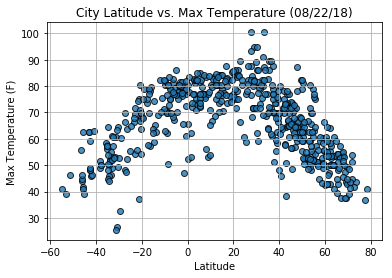

#### Latitude vs. Humidity Plot

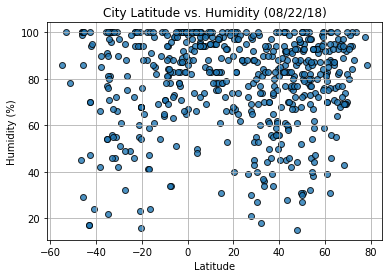

#### Latitude vs. Cloudiness Plot

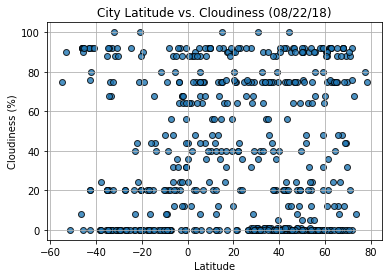

#### Latitude vs. Wind Speed Plot

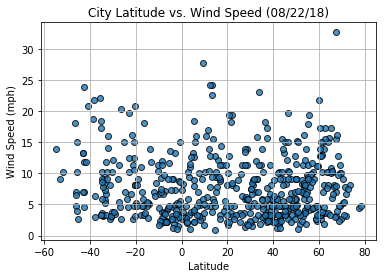

In [ ]:
#time.gmtime(0)
#print(datetime.date)
#currentDateTime = datetime.datetime.now()
#print(currentDateTime.year)

now = datetime.datetime.now()
print str(now)
print "Current year: %d" % now.year


#time.asctime( time.localtime(time.time()))

In [ ]:
#for i in range(len(cityList)):
#print(str(cityDate[0])[:5])
cityReg

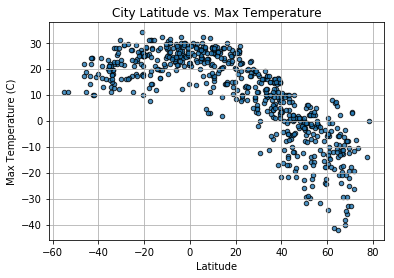

In [9]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Maximum Temperature"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Max Temperature")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Max Temperature.png', bbox_inches="tight")



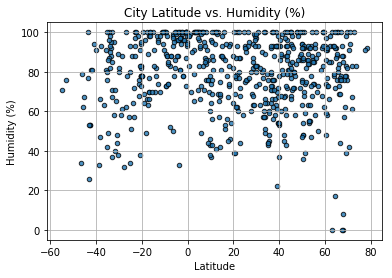

In [13]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Humidity"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Humidity (%)")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Humidity (%).png', bbox_inches="tight")




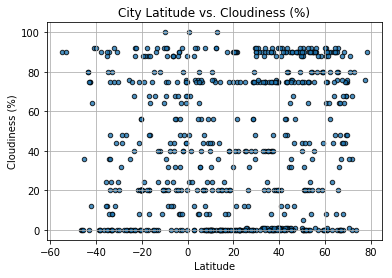

In [14]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Cloudiness"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Cloudiness (%)")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Cloudiness (%).png', bbox_inches="tight")




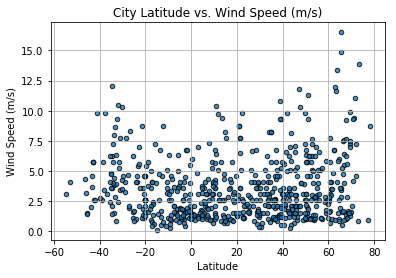

In [16]:
plt.scatter(
    weatherDf["Latitude"]
    , weatherDf["Wind Speed"]
    , s=20 
    , alpha=0.8
    , edgecolors="black"
    , linewidth=1
)

plt.title("City Latitude vs. Wind Speed (m/s)")#, int(str(cityDate[0])[:2])")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(b=None, which='major', axis='both')
plt.savefig('City Latitude vs. Wind Speed (%).png', bbox_inches="tight")


